# __☆ matplotlib 한글 폰트 사용하기 ☆__
---
#### [1. 한글 폰트 설정내역 및 환경 확인](#index1)
#### [2. 폰트를 사용하는 방법은 3가지 방법](#index2)
>##### [1) FontProperties 를 사용하는 방법](#index2_1)
>##### [2) matplotlib.rcParams[ ] 으로 전역 글꼴 설정 방법](#index2_2)
>##### [3) rcParams 를 설정 파일에 직접 적어주는 방법 - 모든 노트북에 공통적용](#index2_3)
#### [3. 나눔고딕 폰트 다운로드 설치하기](#index3)
---

## 1. 한글 폰트 설정내역 및 환경 확인<a id="index1"></a>

In [1]:
# 그래프를 노트북 안에 그리기 위한 설정
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
# 그래프를 그리기 위해 임의의 데이터를 만들어 줍니다.
import numpy as np

data = np.random.randint(-100, 100, 50).cumsum()
data

array([ -74,  -11,  -50,  -73, -169, -110,  -12,   12,   96,  193,  150,
         68,  132,   75,  134,  193,  286,  349,  274,  219,  171,  250,
        244,  269,  363,  369,  418,  472,  450,  365,  388,  398,  441,
        395,  411,  421,  442,  395,  446,  527,  608,  628,  544,  536,
        567,  613,  639,  570,  634,  637])

Text(0.5, 0, '시간(분)')

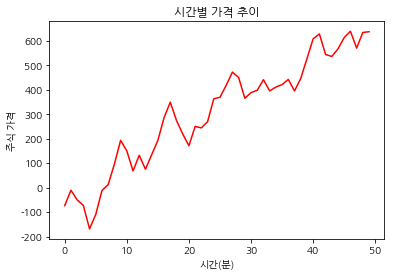

In [3]:
# 기본 폰트로 지정되어 있는 경우 한글이 깨져 나옵니다.
plt.plot(range(50), data, 'r')
mpl.rcParams['axes.unicode_minus'] = False
plt.title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')

In [4]:
# 폰트를 설정하기에 앞서 설치된 matplotlib 버전과 위치 정보를 확인합니다.
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())
print ('설정 파일: ', mpl.matplotlib_fname())

버전:  3.0.0
설치 위치:  /usr/local/lib/python3.7/site-packages/matplotlib/__init__.py
설정 위치:  /Users/alex/.matplotlib
캐시 위치:  /Users/alex/.matplotlib
설정 파일:  /Users/alex/.matplotlib/matplotlibrc


※ 설치 위치(../matplotlib 폴더)에 mpl-data/matplotlibrc 설정 파일을 참고하여, ~/.matplotlib/matplotlibrc 파일에 global 설정 가능

In [5]:
# 설치된 폰트를 찍어 봅니다.
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체개수
print(len(font_list))

# OSX의 설치된 폰트를 가져오는 함수 --> 폰트를 찾지 못하고 null을 반환함
# font_list_mac = fm.OSXInstalledFonts()
# print(len(font_list_mac))

# 사용가능한 시스템의 TTF 폰트 목록 (findSystemFonts()와 동일한 결과)
f = [f.name for f in fm.fontManager.ttflist]
print(len(f))
# 10개의 폰트 명 만 출력
f[:10]

315
352


['DejaVu Sans Mono',
 'STIXSizeFourSym',
 'cmex10',
 'STIXNonUnicode',
 'cmss10',
 'DejaVu Sans Display',
 'DejaVu Serif',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'STIXSizeTwoSym']

In [6]:
# 나눔 고딕을 사용할 예정이기 때문에 이름에 'Nanum'이 들어간 폰트만 가져와 봅니다.
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[('NanumGothic', '/Library/Fonts/NanumGothicExtraBold.ttf'),
 ('NanumGothic', '/Library/Fonts/NanumGothicBold.ttf'),
 ('NanumGothic', '/Library/Fonts/NanumGothic.ttf')]

---
# 2. 폰트를 사용하는 방법은 3가지 방법<a id="index2"></a>
1. FontProperties 를 사용하는 방법 - 그래프의 폰트가 필요한 항목마다 지정해 주어야 합니다.
1. matplotlib.rcParams[]으로 전역 글꼴 설정 방법 - 그래프에 설정을 해주면 폰트가 필요한 항목에 적용됩니다.
1. 위 2)번의 방법을 mpl.matplotlib_fname()로 읽어지는 설정 파일에 직접 적어주는 방법, 단 모든 노트북에 적용됩니다. 노트북을 열 때마다 지정해 주지 않아도 돼서 편리합니다.

### 1) FontProperties 를 사용하는 방법<a id="index2_1"></a>

텍스트를 지정하는 항목에 지정해 사용할 수 있습니다. 지정해 준 항목에만 해당 폰트가 적용 됩니다.

- matplotlib.pyplot
    - title()
    - xlabel()
    - ylabel()
    - legend()
    - text()
- matplotlib.axes
    - set_title()

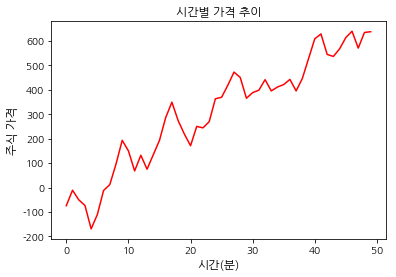

In [7]:
# fname 옵션을 사용하는 방법
path = '/Library/Fonts/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=12)

plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이', fontproperties=fontprop)
plt.ylabel('주식 가격', fontproperties=fontprop)
plt.xlabel('시간(분)', fontproperties=fontprop)
plt.show()

### 2) matplotlib.rcParams[ ] 으로 전역 글꼴 설정 방법<a id="index2_2"></a>

In [8]:
# 기본 설정 읽기 (size, family)
print('# 설정되어있는 폰트 사이즈')
print (plt.rcParams['font.size']) 
print('# 설정되어있는 폰트 글꼴')
print (plt.rcParams['font.family'])

# 기본 설정 읽기 (serif, sans-serif, monospace)
print('serif 세리프가 있는 폰트--------')
print (plt.rcParams['font.serif']) 
print('sans-serif 세리프가 없는 폰트 --------')
print (plt.rcParams['font.sans-serif']) 
print('monospace 고정폭 글꼴--------')
print (plt.rcParams['font.monospace'])

# 설정되어있는 폰트 사이즈
10.0
# 설정되어있는 폰트 글꼴
['NanumGothic']
serif 세리프가 있는 폰트--------
['DejaVu Serif', 'Bitstream Vera Serif', 'Computer Modern Roman', 'New Century Schoolbook', 'Century Schoolbook L', 'Utopia', 'ITC Bookman', 'Bookman', 'Nimbus Roman No9 L', 'Times New Roman', 'Times', 'Palatino', 'Charter', 'serif']
sans-serif 세리프가 없는 폰트 --------
['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif']
monospace 고정폭 글꼴--------
['DejaVu Sans Mono', 'Bitstream Vera Sans Mono', 'Computer Modern Typewriter', 'Andale Mono', 'Nimbus Mono L', 'Courier New', 'Courier', 'Fixed', 'Terminal', 'monospace']


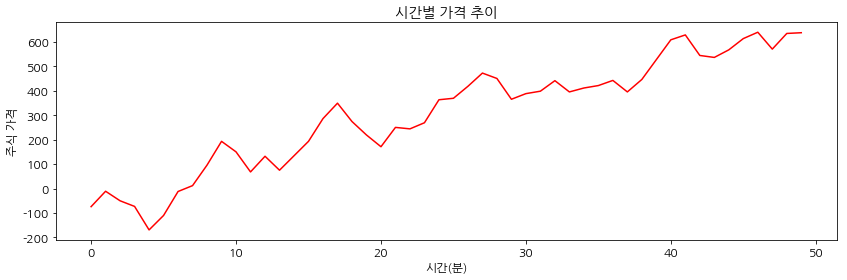

In [9]:
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (14,4)
plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')
plt.style.use('seaborn-pastel')
plt.show()

### ※ rcParams 대신 FontProperties 와 plt.rc 를 사용하는 방법

NanumGothic


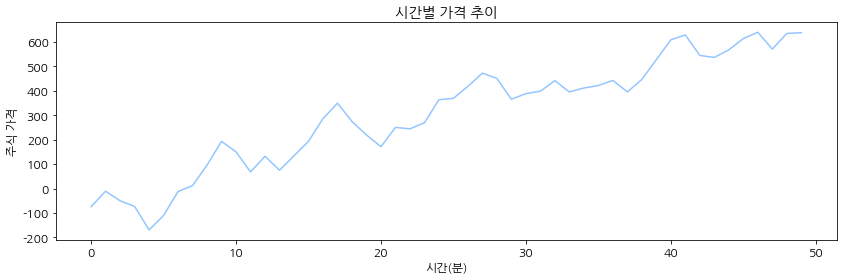

In [10]:
path = '/Library/Fonts/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
print(font_name)
plt.rc('font', family=font_name)

fig, ax = plt.subplots()
ax.plot(data)
ax.set_title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')
plt.style.use('ggplot')
plt.show()

## 3) rcParams 를 설정 파일에 직접 적어주는 방법 - 모든 노트북에 공통적용<a id="index2_3"></a>

In [11]:
print('설정 파일 위치: ', mpl.matplotlib_fname())

설정 파일 위치:  /Users/alex/.matplotlib/matplotlibrc


- 설치 폴더(/usr/local/lib/python3.7/site-packages/matplotlib/)의 mpl-data/matplotlibrc 파일에서 설정 값을 참고할 수 있습니다.
- 설정 파일(~/.matplotlib/matplotlibrc)에 아래 항목을 추가 합니다.
    - font.family : NanumGothic
- 이 외에 자주 사용하는 설정도 함께 해주면 편리합니다.
    - font.size : 12.0
- 이곳에 폰트를 지정해 주면 노트북을 실행할 때 바로 로드되도록 설정할 수 있습니다.

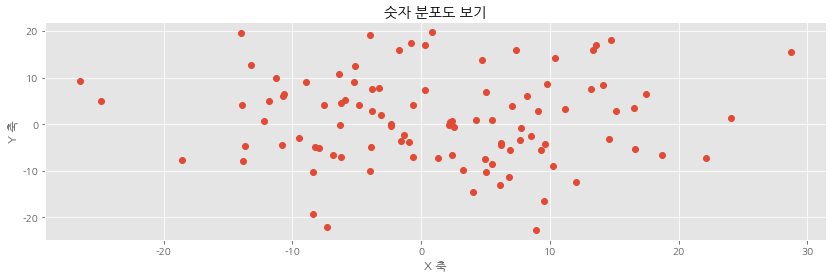

In [12]:
# .matplotlib/matplotlibrc 파일에 font.family : NanumGothic와 font.size : 12.0 설정 후 아래 코드 실행
fig, ax = plt.subplots()
ax.plot(10*np.random.randn(100), 10*np.random.randn(100), 'o')
ax.set_title('숫자 분포도 보기')
ax.set_xlabel("X 축")
ax.set_ylabel("Y 축")
plt.show()

---
## 3. 나눔고딕 폰트 다운로드 설치하기<a id="index3"></a>

### [나눔고딕 폰트 다운로드](https://hangeul.naver.com/download.nhn "https://hangeul.naver.com/download.nhn")
1. 기존에 설치되어 있는 나눔고딕 폰트가 정상적으로 인식되지 않고 삭제도 안되어서, 폰트를 다운로드 하여 새로 설치 함
2. 동일한 폰트가 2개 복사본이 설치되어, Default로 설치된 폰트를 비활성화 함(폰트관리자에서 해당 폰트 우측 마우스>중복해결>수동으로해결>이중복해결) 

>- 기존에 설치되어 있는 폰트 : /System/Library/Assets/com_apple_MobileAsset_Font5/5cacaa007b5810b9f023061183336403b9d5c20b.asset/AssetData/NanumGothic.ttc
>- 새로 설치한 폰트 : /Library/Fonts/NanumGothic.ttf

---
#### [참고 사이트]
[실습으로 배우는 데이터 사이언스 - Matplotlib에서 한글 폰트 사용하기](https://programmers.co.kr/learn/courses/21/lessons/950)

[FinanceData - matplotlib + 한글 (OSX)](https://financedata.github.io/posts/matplotlib-hangul-for-osx.html)